In [1]:
# Imports necesarios para el notebook
from random import seed

from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp

from util import time_algorithm

# Siempre seteamos la seed de aleatoridad para que los # resultados sean reproducibles
seed(12345)
np.random.seed(12345)

sns.set_theme()


# Primera Parte - algoritmo greedy

## Primera medicion

In [2]:
from tp1.algoritmo_greedy import elecciones_sophia
from collections import deque

Primero mediremos para arreglos de tamaños entre 100 y 100000 de monedas con valores de entre 0 y 2000.

In [3]:
def get_random_array(size: int):
    return deque(np.random.randint(0, 2000, size))

x = np.linspace(100, 500_000, 20).astype(int)

results = time_algorithm(elecciones_sophia, x, lambda s: [get_random_array(s)])

Tiempos de ejecución:

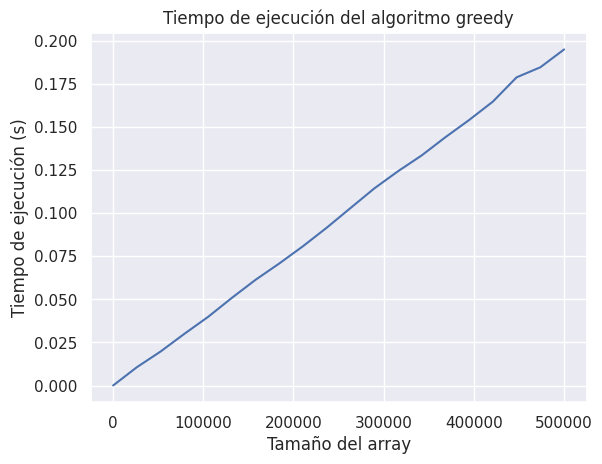

In [4]:
ax: plt.Axes
fig, ax = plt.subplots()
ax.plot(x, [results[i] for i in x], label="Medición")
ax.set_title('Tiempo de ejecución del algoritmo greedy')
ax.set_xlabel('Tamaño del array')
ax.set_ylabel('Tiempo de ejecución (s)')
None

Vamos entonces a calcular el ajuste por cuadrados mínimos a traves de la biblioteca scipy:

In [5]:
f_n = lambda x, c1, c2: c1 * x  + c2 

c, _ = sp.optimize.curve_fit(f_n, x, [results[n] for n in x])

print(f"c_1 = {c[0]}, c_2 = {c[1]}")
r = np.sum((c[0] * x + c[1] - [results[n] for n in x])**2)
print(f"Error cuadrático total: {r}")

c_1 = 3.936443225882364e-07, c_2 = -0.0008261059184676205
Error cuadrático total: 2.2696114387216117e-05


Vamos a graficar los datos y el ajuste para corroborar que efectivamente se ajusta bien:

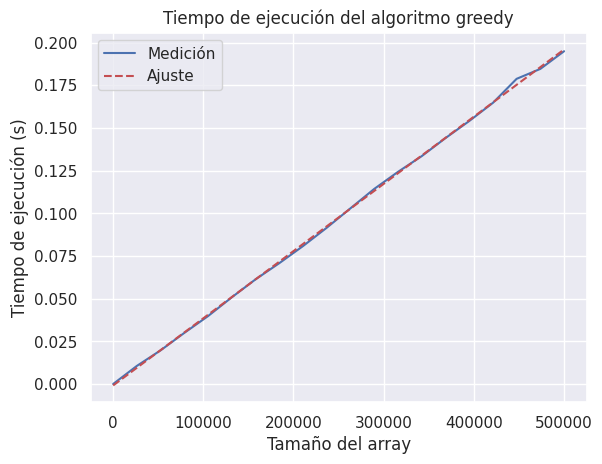

In [6]:
ax.plot(x, [c[0] * n  + c[1] for n in x], 'r--', label="Ajuste")
ax.legend()
fig

Y por ultimo, el error que se comete por cada cantidad de monedas.

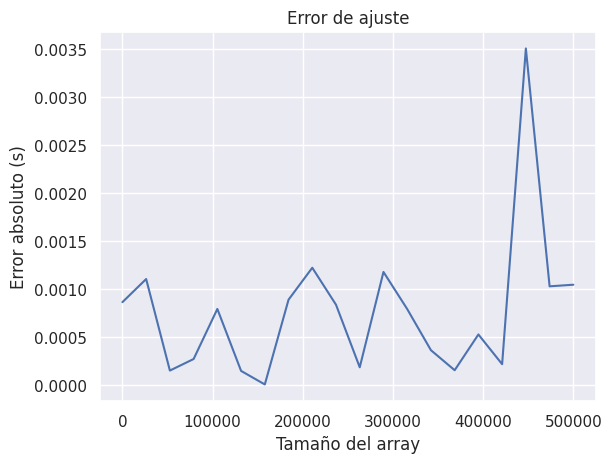

In [7]:
ax: plt.Axes
fig, ax = plt.subplots()
errors = [np.abs(c[0] * n  + c[1] - results[n]) for n in x]
ax.plot(x, errors)
ax.set_title('Error de ajuste')
ax.set_xlabel('Tamaño del array')
ax.set_ylabel('Error absoluto (s)')
None

Puede verse que el error es pequeño y que la complejidad del algoritmo greedy se comporta como $O(n)$

## Segunda medicion

Se hará una medición similar a la anterior, con la intención de ver cómo afecta la variablidad de los valores de las monedas al algoritmo. Para esto los valores de las monedas irán desde 1000000000 hasta 1000002000.

In [8]:
def get_random_array(size: int):
    return deque(np.random.randint(1000000000, 1000002000, size))

x = np.linspace(100, 500_000, 20).astype(int)

results_monedas_grandes = time_algorithm(elecciones_sophia, x, lambda s: [get_random_array(s)])

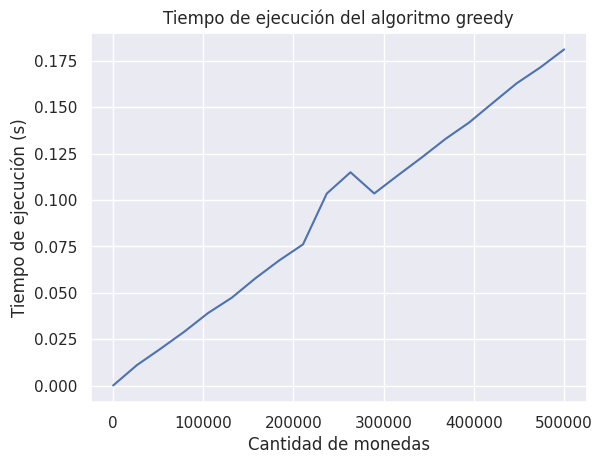

In [9]:
ax: plt.Axes
fig, ax = plt.subplots()
ax.plot(x, [results_monedas_grandes[i] for i in x], label="Medición")
ax.set_title('Tiempo de ejecución del algoritmo greedy')
ax.set_xlabel('Cantidad de monedas')
ax.set_ylabel('Tiempo de ejecución (s)')
None

c_1 = 3.936443225882364e-07, c_2 = -0.0008261059184676205
Error cuadrático total: 0.000636326248963269


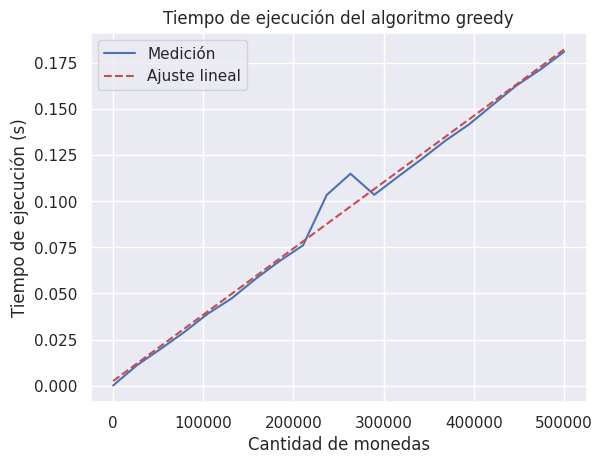

In [10]:
c_monedas_grandes, _ = sp.optimize.curve_fit(f_n, x, [results_monedas_grandes[n] for n in x])

print(f"c_1 = {c[0]}, c_2 = {c[1]}")
r = np.sum((c_monedas_grandes[0] * x + c_monedas_grandes[1] - [results_monedas_grandes[n] for n in x])**2)
print(f"Error cuadrático total: {r}")

# Graficamos el ajuste
ax.plot(x, [c_monedas_grandes[0] * n + c_monedas_grandes[1] for n in x], 'r--', label="Ajuste lineal")
ax.legend()
fig


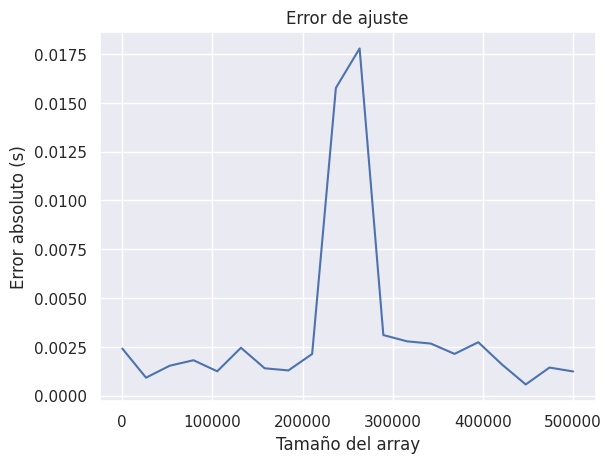

In [11]:
ax: plt.Axes
fig, ax = plt.subplots()
errors = [np.abs(c_monedas_grandes[0] * n + c_monedas_grandes[1] - results_monedas_grandes[n]) for n in x]
ax.plot(x, errors)
ax.set_title('Error de ajuste')
ax.set_xlabel('Tamaño del array')
ax.set_ylabel('Error absoluto (s)')
None

### Comparando mediciones

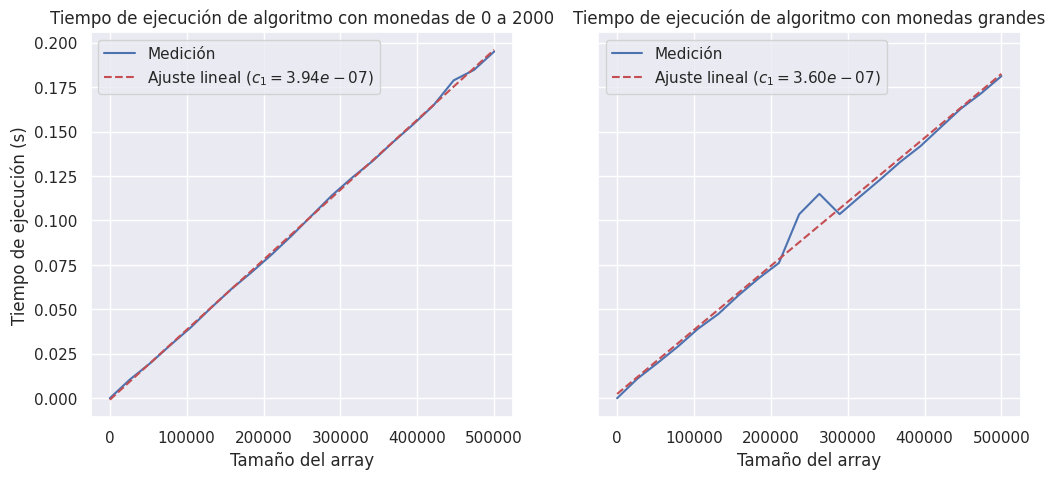

In [12]:
axs: tuple[plt.Axes, plt.Axes]
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
axs[0].plot(x, [results[n] for n in x], label="Medición")
axs[0].plot(x, [f_n(n, c[0], c[1]) for n in x], 'r--', label=f"Ajuste lineal ($c_1 = {c[0] :.2e}$)")
axs[0].set_title('Tiempo de ejecución de algoritmo con monedas de 0 a 2000')
axs[0].set_xlabel('Tamaño del array')
axs[0].set_ylabel('Tiempo de ejecución (s)')
axs[0].legend()

axs[1].plot(x, [results_monedas_grandes[n] for n in x], label="Medición")
axs[1].plot(x, [f_n(n, c_monedas_grandes[0], c_monedas_grandes[1]) for n in x], 'r--', label=f"Ajuste lineal ($c_1 = {c_monedas_grandes[0] :.2e}$)")
axs[1].set_title('Tiempo de ejecución de algoritmo con monedas grandes')
axs[1].set_xlabel('Tamaño del array')
axs[1].legend()
None

# Segunda parte - programación dinámica

In [2]:
from tp2.algoritmo_pd import elecciones_hermanos

In [3]:
def get_random_array(size: int):
    return np.random.randint(0, 2000, size)

x = np.linspace(100, 5_000, 20).astype(int)


results = time_algorithm(elecciones_hermanos, x, lambda s: [get_random_array(s)])

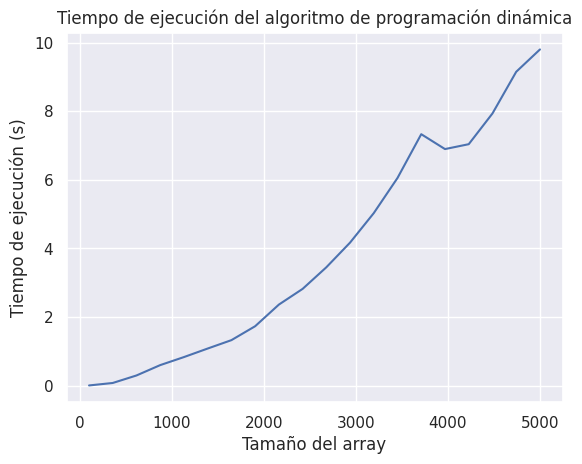

In [4]:
ax: plt.Axes
fig, ax = plt.subplots()
ax.plot(x, [results[i] for i in x], label="Medición")
ax.set_title('Tiempo de ejecución del algoritmo de programación dinámica')
ax.set_xlabel('Tamaño del array')
ax.set_ylabel('Tiempo de ejecución (s)')
None

In [10]:
f_n2 = lambda x, c1, c2: c1 * x**2 + c2
c, _ = sp.optimize.curve_fit(f_n2, x, [results[n] for n in x])

errors = [np.abs(c[0] * n**2 + c[1] - results[n]) for n in x]

print(f"Error cuadrático total para n^2: {np.sum(np.power(errors, 2))}")

Error cuadrático total para n^2: 4.662760091028692


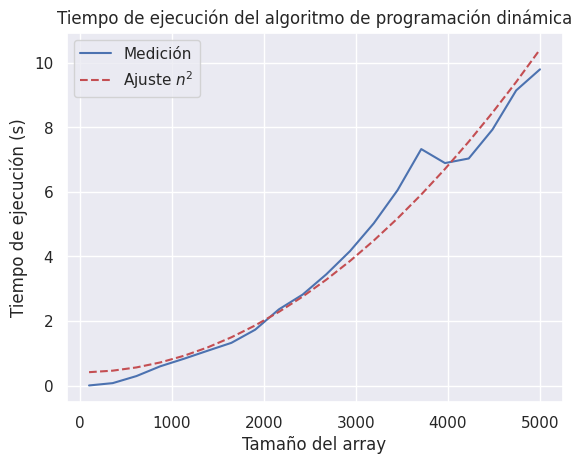

In [11]:
ax: plt.Axes
fig, ax = plt.subplots()
ax.plot(x, [results[n] for n in x], label="Medición")
ax.plot(x, [f_n2(n, c[0], c[1]) for n in x], 'r--', label="Ajuste $n^2$")
ax.set_title('Tiempo de ejecución del algoritmo de programación dinámica')
ax.set_xlabel('Tamaño del array')
ax.set_ylabel('Tiempo de ejecución (s)')
ax.legend()
None

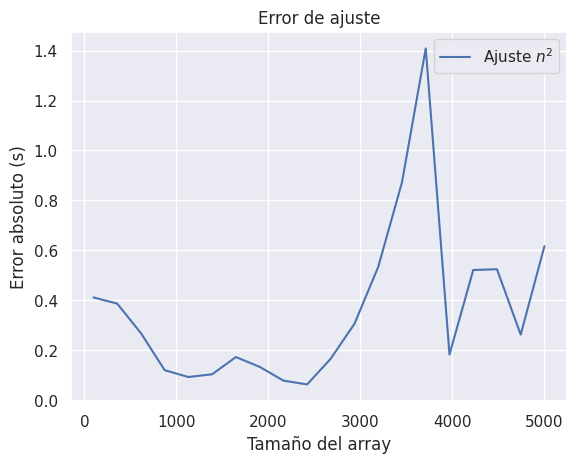

In [ ]:
ax: plt.Axes
fig, ax = plt.subplots()
ax.plot(x, errors, label="Ajuste $n^2$")
ax.set_title('Error de ajuste')
ax.set_xlabel('Tamaño del array')
ax.set_ylabel('Error absoluto (s)')
ax.legend()
None

# Tercera parte - Batalla Naval

In [2]:
from tp3.bt import batalla_naval
from util import time_algorithmm

En primer lugar, se irán variando los valores de n y m y se dejará fija la cantidad de barcos en 10.

In [11]:
n_values = np.linspace(5, 25, 10).astype(int)
m_values = np.linspace(5, 25, 10).astype(int)
k_fixed = 5 # Barcos fijos
sizes = [(n, m) for n in n_values for m in m_values]

def get_args(n, m):
    dem_fil = np.random.randint(0, 40, n)
    dem_col = np.random.randint(0, 40, m)
    barcos = sorted(np.random.randint(1, min(n, m), k_fixed), reverse=True)
    return [dem_fil, dem_col, barcos]

results = time_algorithmm(batalla_naval, sizes, get_args)


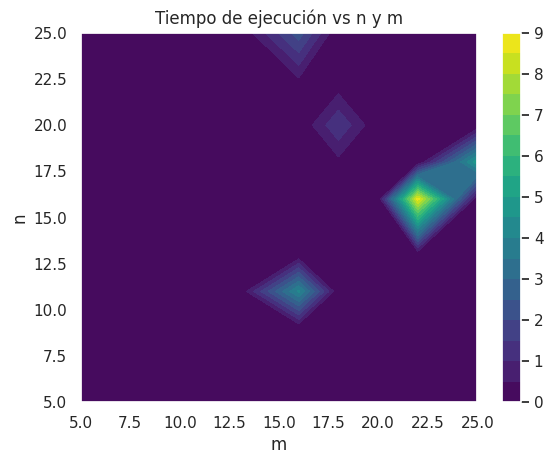

In [13]:
times = np.array([results[size] for size in sizes]).reshape(len(n_values), len(m_values))

# Crear el gráfico
fig, ax = plt.subplots()
# Usar un gráfico de contornos
c = ax.contourf(m_values, n_values, times, 20, cmap='viridis')
fig.colorbar(c, ax=ax)  # Añadir barra de color
ax.set_title('Tiempo de ejecución vs n y m')
ax.set_xlabel('m')
ax.set_ylabel('n')
plt.show()